In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Assuming your dataset is in a CSV file named 'traffic_data.csv'
df = pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/Fast Lane/Project-01/Metro_Interstate_Traffic_Volume.csv')

# Display the first few rows of the dataset
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [4]:
# # Display information about the dataset
print(df.info())

# Check unique values for categorical variables
print(df['holiday'].unique())
print(df['weather_main'].unique())
print(df['weather_description'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
[nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow

In [5]:
# Check for missing values
print(df.isnull().sum())

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [6]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)


In [7]:


# Example: Min-Max scaling for numerical features
numerical_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [8]:
# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract time-related features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

In [9]:
# Sort the dataframe based on date_time
df.sort_values(by='date_time', inplace=True)

# Example: Create lag features for 'traffic_volume'
for i in range(1, 4):  # Creating lag features for the past 3 hours
    df[f'traffic_volume_lag_{i}'] = df['traffic_volume'].shift(i)

# Drop rows with NaN resulting from creating lag features
df.dropna(inplace=True)


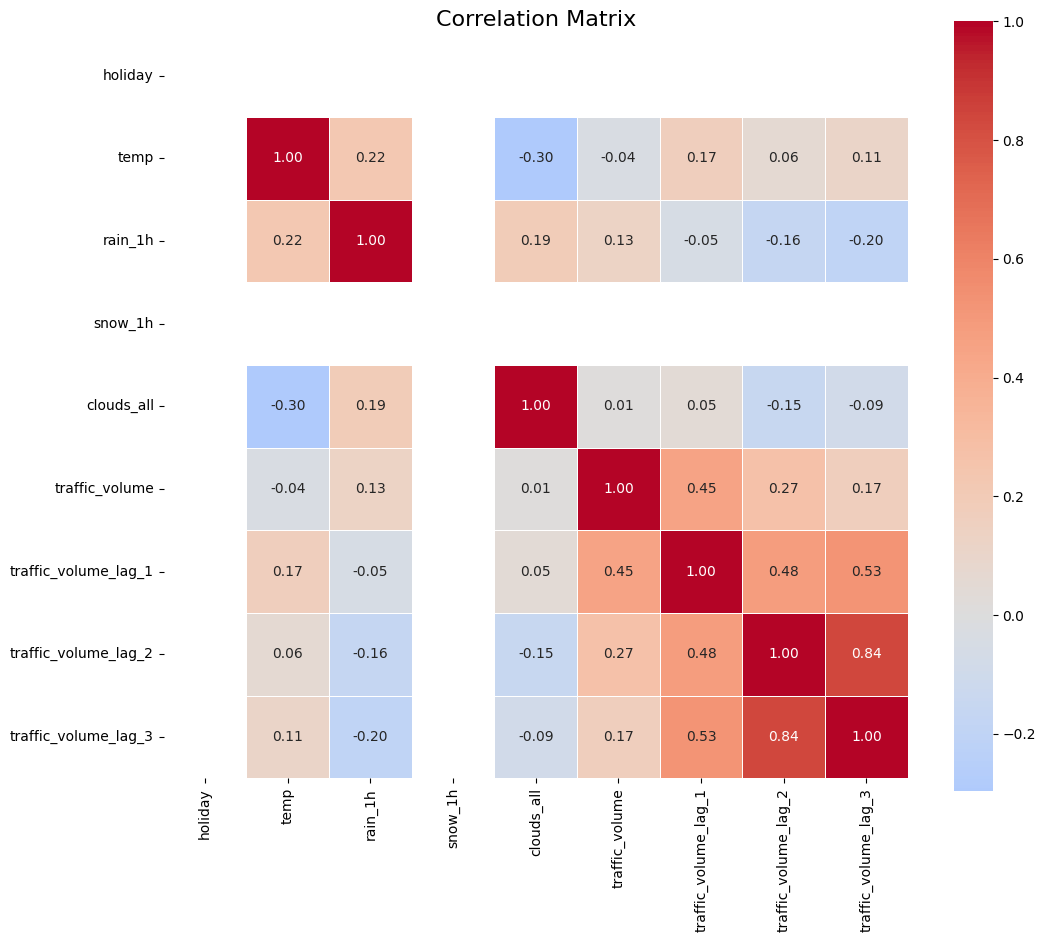

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of holidays
holiday_list = ['Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day',
                'New Years Day', 'Washingtons Birthday', 'Memorial Day', 'Independence Day',
                'State Fair', 'Labor Day', 'Martin Luther King Jr Day']

# Convert 'holiday' column to numeric (0 and 1)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x in holiday_list else 0)

# Exclude non-numeric columns from the correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Set plot size and layout
plt.figure(figsize=(12, 10))

# Plotting a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


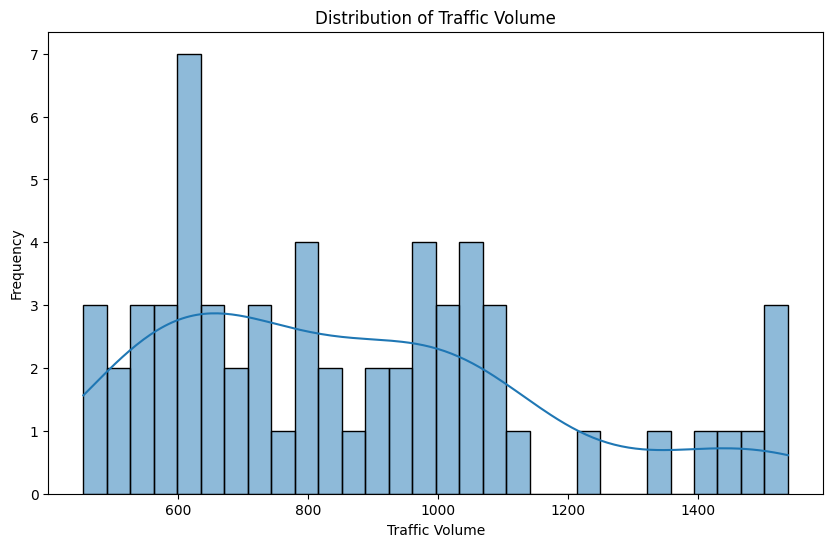

In [11]:

# Histogram of traffic volume
plt.figure(figsize=(10, 6))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()


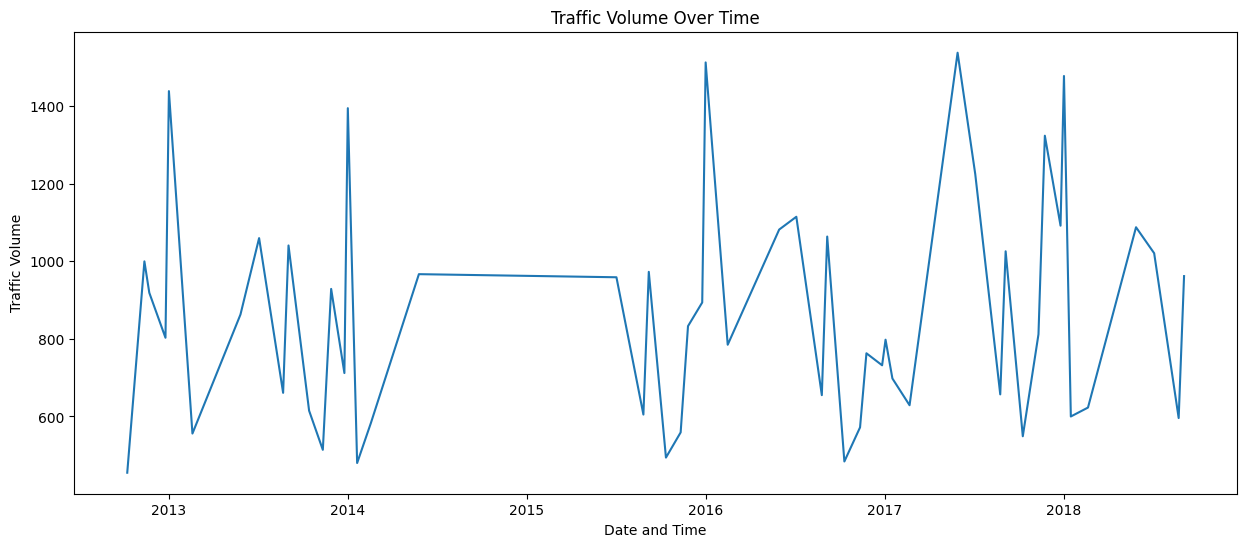

In [12]:
# Line plot of traffic volume over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='date_time', y='traffic_volume', data=df)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.show()

C:\Users\Deepak\AppData\Local\Temp\ipykernel_3484\1299069258.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_main', y='traffic_volume', data=df, ci=None)


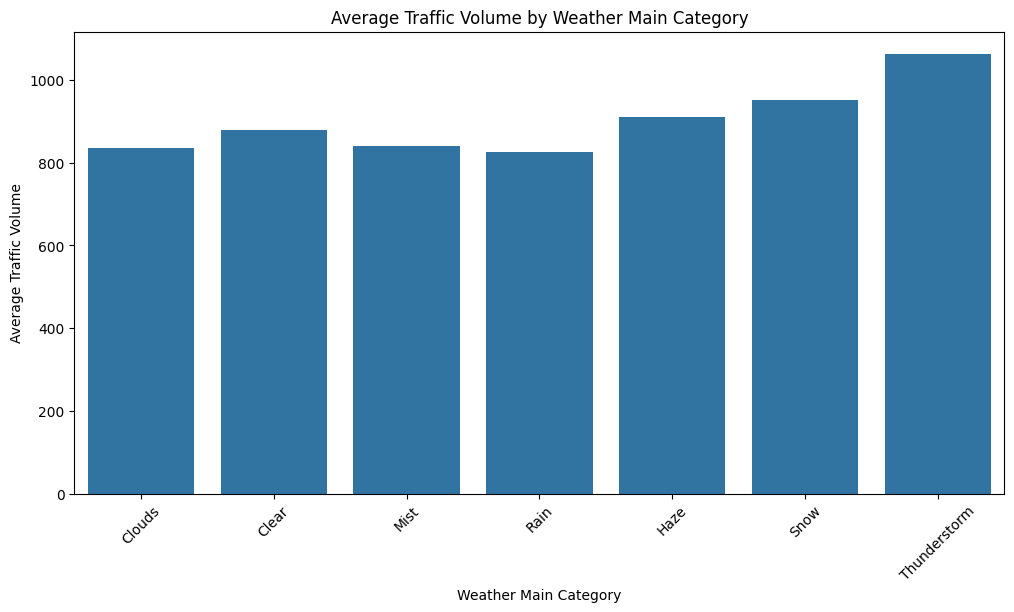

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of average traffic volume for each weather category
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_main', y='traffic_volume', data=df, ci=None)
plt.title('Average Traffic Volume by Weather Main Category')
plt.xlabel('Weather Main Category')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


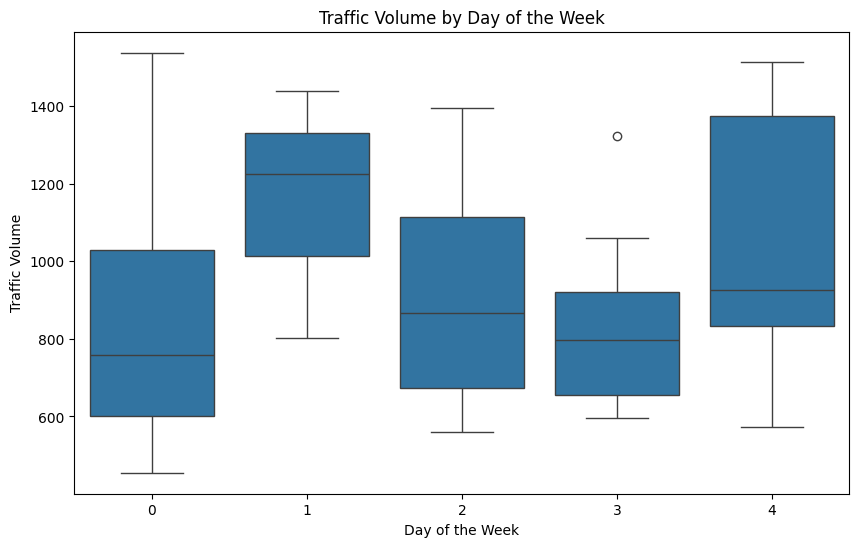

In [14]:
# Boxplot of traffic volume by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='traffic_volume', data=df)
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.show()

Mean Absolute Error: 197.4353846153846
temp           0.403734
month          0.251818
day_of_week    0.188553
clouds_all     0.146976
rain_1h        0.008919
snow_1h        0.000000
hour           0.000000
dtype: float64


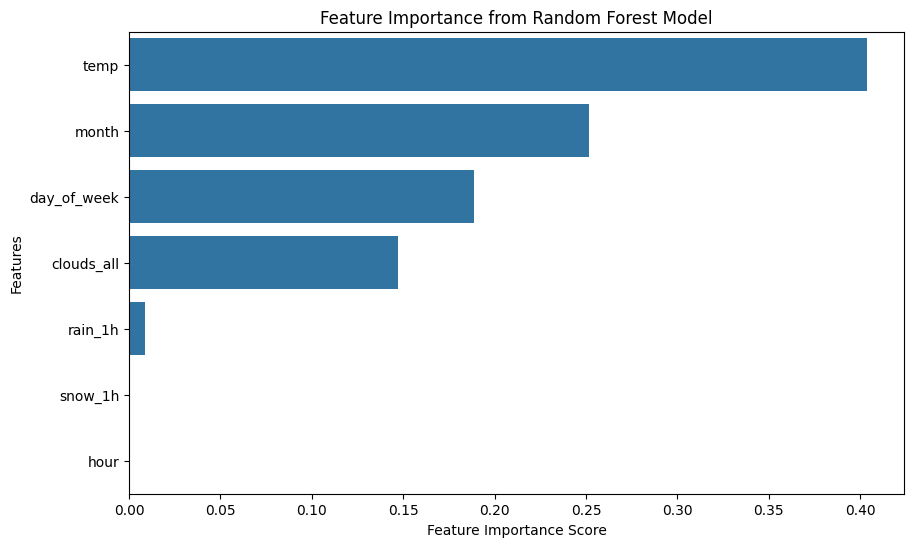

In [15]:
# Features: 'temp', 'rain_1h', 'snow_1h', 'clouds_all', and other relevant features
X = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month']]

# Target variable: 'traffic_volume'
y = df['traffic_volume']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()
